In [6]:
# dimensionality_reduction/pca_notebook.ipynb
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from src.Dimensionality_reduction.pca import perform_pca

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('C:/Users/aksha/Crisp DM/Data/processed_data.csv')

In [14]:
from sklearn.impute import SimpleImputer
import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Use mode imputation for non-numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
imputer_non_numeric = SimpleImputer(strategy='most_frequent')

# Identify numeric and non-numeric columns
numeric_columns = df.select_dtypes(include='number').columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Impute missing values
df_numeric_imputed = pd.DataFrame(imputer_numeric.fit_transform(df[numeric_columns]), columns=numeric_columns)
df_non_numeric_imputed = pd.DataFrame(imputer_non_numeric.fit_transform(df[non_numeric_columns]), columns=non_numeric_columns)

# Concatenate the imputed dataframes
df_imputed = pd.concat([df_numeric_imputed, df_non_numeric_imputed], axis=1)

# Convert categorical columns to numeric using one-hot encoding
df_imputed = pd.get_dummies(df_imputed, columns=non_numeric_columns)

# Convert target column to numeric
df_imputed['mpg'] = pd.to_numeric(df_imputed['mpg'], errors='coerce')

# Perform PCA or other analysis with the preprocessed dataset


Explained Variance Ratio for each Principal Component: [0.01534931 0.00590494]


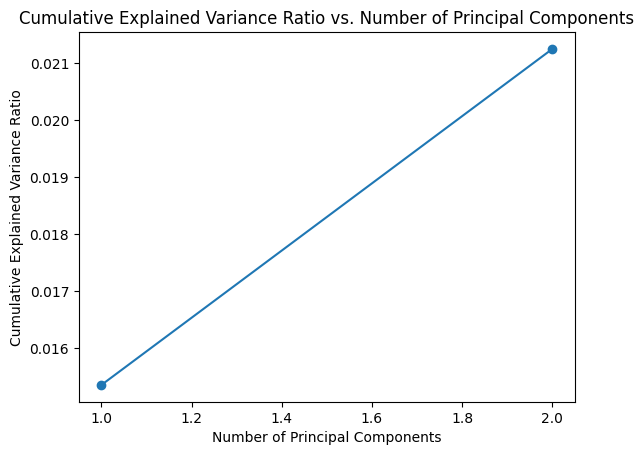

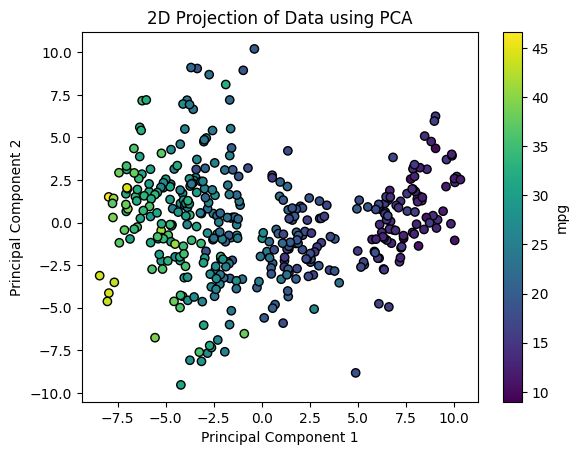

In [16]:

# Assuming 'mpg' is the target variable
target_column = 'mpg'

# Separate features and target variable
X = df_imputed.drop(columns=[target_column])
y = df_imputed[target_column]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specify the number of principal components to retain
n_components = 2

# Create and fit PCA model
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio for each Principal Component: {explained_variance_ratio}")

# Plot the cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.savefig('cumulative_explained_variance.png')
plt.show()

# Plot the 2D projection of the data using the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Data using PCA')
plt.colorbar(label=target_column)
plt.savefig('2d_projection_pca.png')
plt.show()

